<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
df.shape

(42000, 785)

In [8]:
df.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler

In [10]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X=df.drop(columns=['label'])
y=df['label']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [17]:
y_predict

array([8. , 1. , 9. , ..., 3.4, 0. , 9. ])

In [15]:
y_predict=knn.predict(X_test)

In [18]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y_test

,label
5457,8
38509,1
25536,9
31803,9
39863,8
...,...
8388,4
29359,9
40276,3
18421,0


In [23]:
accuracy_score(y_test,y_predict)

0.8442857142857143

In [21]:
y_predict.dtype

dtype('float64')

In [22]:
y_predict = y_predict.astype(int)
y_test = y_test.astype(int)

In [31]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100)
X_train_T=pca.fit_transform(X_train)
X_test_T=pca.transform(X_test)



In [32]:
knn.fit(X_train_T,y_train)

KNeighborsRegressor()

In [33]:
y_predict=knn.predict(X_test_T)

In [34]:
y_predict=y_predict.astype(int)

In [35]:
accuracy_score(y_test,y_predict)

0.8733333333333333

In [36]:
for i in range(1,783):
  pca=PCA(n_components=i)
  X_train_T=pca.fit_transform(X_train)
  X_test_T=pca.transform(X_test)
  knn.fit(X_train_T,y_train)
  y_predict=knn.predict(X_test_T).astype(int)
  print(i,accuracy_score(y_test,y_predict))


1 0.1494047619047619
2 0.20261904761904762
3 0.32166666666666666
4 0.4405952380952381
5 0.5129761904761905
6 0.6180952380952381
7 0.6421428571428571
8 0.6952380952380952
9 0.7130952380952381
10 0.7604761904761905
11 0.7740476190476191
12 0.7814285714285715
13 0.8027380952380953
14 0.8164285714285714
15 0.8196428571428571
16 0.8267857142857142
17 0.8286904761904762
18 0.8358333333333333
19 0.8432142857142857
20 0.8454761904761905
21 0.8478571428571429
22 0.8469047619047619
23 0.8483333333333334
24 0.8482142857142857
25 0.85
26 0.8514285714285714
27 0.8538095238095238
28 0.8563095238095239
29 0.8553571428571428
30 0.8560714285714286
31 0.8552380952380952
32 0.8586904761904762
33 0.8601190476190477
34 0.8601190476190477
35 0.863452380952381
36 0.8647619047619047
37 0.8652380952380953
38 0.8689285714285714
39 0.8689285714285714
40 0.8680952380952381
41 0.8697619047619047
42 0.8673809523809524
43 0.8660714285714286
44 0.8677380952380952
45 0.8675
46 0.8667857142857143
47 0.8664285714285714


KeyboardInterrupt: 

In [37]:
pca=PCA(n_components=2)
X_train_T=pca.fit_transform(X_train)
X_test_T=pca.transform(X_test)

In [45]:
y_train=y_train.astype(int)

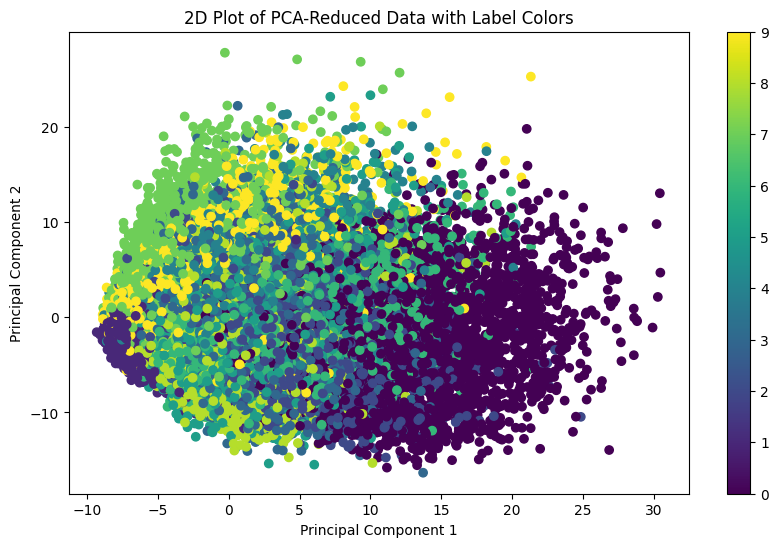

In [46]:
import plotly.express as px

fig = px.scatter(x=X_test_T[:, 0], y=X_test_T[:, 1], color=y_test)
fig.show()


In [49]:
pca=PCA(n_components=3)
X_train_T=pca.fit_transform(X_train)
X_test_T=pca.transform(X_test)

In [52]:


import plotly.graph_objects as go

fig = go.Figure()

# Add traces for each digit (0-9)
for digit in range(10):
  fig.add_trace(go.Scatter3d(
      x=X_test_T[y_test == digit, 0],
      y=X_test_T[y_test == digit, 1],
      z=X_test_T[y_test == digit, 2],
      mode='markers',
      name=str(digit),
      marker=dict(
          size=4,
          opacity=0.8
      )
  ))


# Create dropdown menu
buttons = []
for digit in range(10):
    buttons.append(dict(
        label=str(digit),
        method="update",
        args=[{"visible": [True if i == digit else False for i in range(10)]},
              {"title": f"Digit: {digit}"}]
    ))


updatemenus = [dict(
    active=0,
    buttons=buttons,
    direction="down",
    pad={"r": 10, "t": 10},
    showactive=True,
    x=0.1,
    xanchor="left",
    y=1.1,
    yanchor="top"
)]

fig.update_layout(
    updatemenus=updatemenus,
    title="3D Scatter Plot of Digits",
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    )
)

fig.show()
